In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Set styles
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [22]:
import pandas as pd
print("Pandas imported successfully")


Pandas imported successfully


In [23]:
import matplotlib.pyplot as plt
print("matplotlib is working!")



matplotlib is working!


In [24]:
# Load dataset
df = pd.read_csv('../data/drugs_side_effects_drugs_com.csv')

  # Make sure the file is in the data/ folder

# Show first 5 rows
df.head()


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [25]:
# Dataset shape and info
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()


Rows: 2931, Columns: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_descri

In [26]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


alcohol                          1554
related_drugs                    1469
rating                           1345
no_of_reviews                    1345
brand_names                      1213
pregnancy_category                229
side_effects                      124
drug_classes                       82
generic_name                       43
rx_otc                              1
drug_name                           0
activity                            0
medical_condition                   0
medical_condition_description       0
csa                                 0
drug_link                           0
medical_condition_url               0
dtype: int64

In [27]:
# Convert 'rating' to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Replace 'X' with 1, NaN with 0 for alcohol column
df['alcohol'] = df['alcohol'].replace({'X': 1}).fillna(0)

# Fill missing values
df['side_effects'] = df['side_effects'].fillna('Unknown')
df['drug_classes'] = df['drug_classes'].fillna('Unknown')
df['pregnancy_category'] = df['pregnancy_category'].fillna('Unknown')
df['rx_otc'] = df['rx_otc'].fillna('Unknown')
df['rating'] = df['rating'].fillna(0)
df['no_of_reviews'] = df['no_of_reviews'].fillna(0)


In [28]:
import os

# Create 'images' folder if it doesn't exist
if not os.path.exists("../images"):  # or "images" based on your path
    os.makedirs("../images")


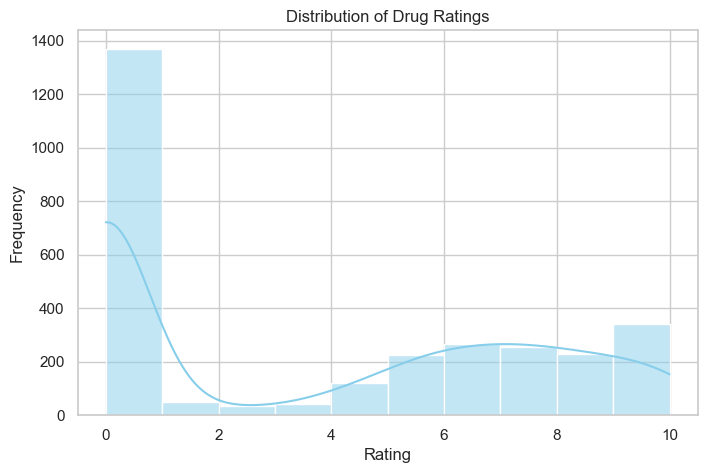

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('../images/ratings_distribution.png')  # if inside notebooks/

plt.show()


In [30]:
import os
if not os.path.exists("images"):
    os.makedirs("images")


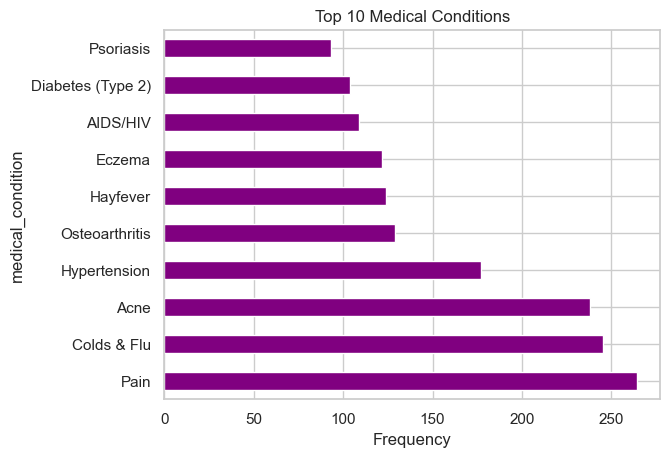

In [31]:
top_conditions = df['medical_condition'].value_counts().head(10)
top_conditions.plot(kind='barh', color='purple')
plt.title('Top 10 Medical Conditions')
plt.xlabel('Frequency')
plt.savefig('images/top_conditions.png')
plt.show()


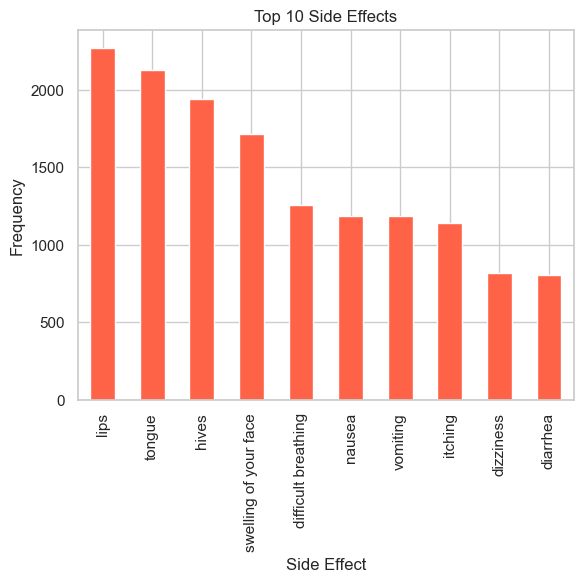

In [32]:
import re
from collections import Counter

# Extract side effects
def extract_side_effects(text):
    return [t.strip() for t in re.split(r'[;,]', str(text))]

side_effects = df['side_effects'].dropna().apply(extract_side_effects).explode()
top_side_effects = side_effects.value_counts().head(10)

top_side_effects.plot(kind='bar', color='tomato')
plt.title('Top 10 Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Frequency')
plt.savefig('images/side_effects_bar.png')
plt.show()


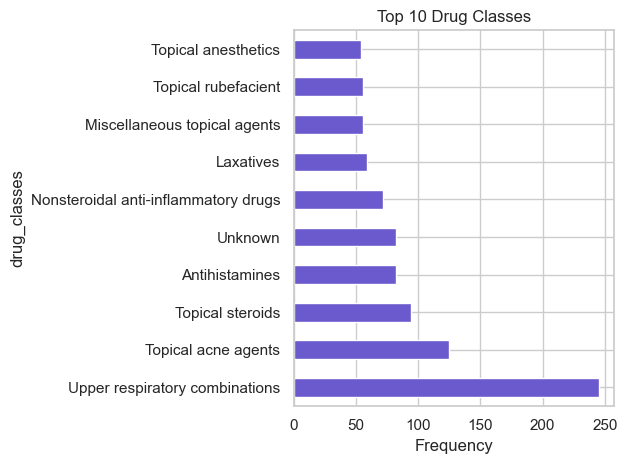

In [33]:
drug_classes = df['drug_classes'].dropna().apply(extract_side_effects).explode()
top_classes = drug_classes.value_counts().head(10)

top_classes.plot(kind='barh', color='slateblue')
plt.title('Top 10 Drug Classes')
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('../images/top_drug_classes.png')
plt.show()


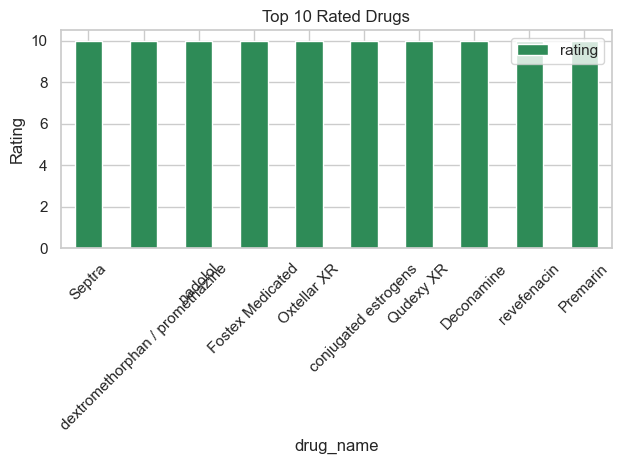

In [34]:
top_rated = df.sort_values('rating', ascending=False).drop_duplicates('drug_name').head(10)
top_rated = top_rated[['drug_name', 'rating']].set_index('drug_name')

top_rated.plot(kind='bar', color='seagreen')
plt.title("Top 10 Rated Drugs")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/top_rated_drugs.png')
plt.show()


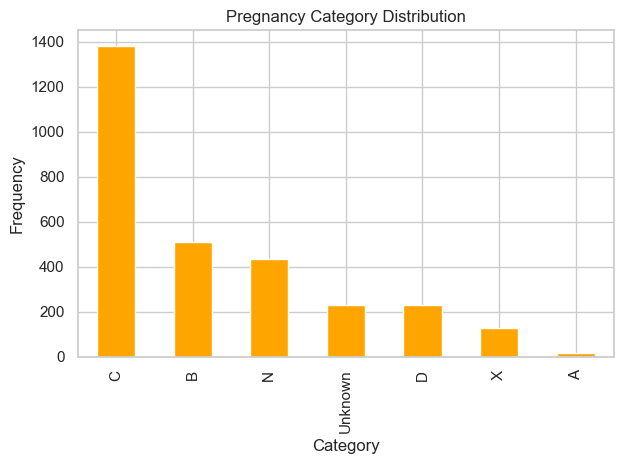

In [35]:
pregnancy_counts = df['pregnancy_category'].value_counts()

pregnancy_counts.plot(kind='bar', color='orange')
plt.title("Pregnancy Category Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('../images/pregnancy_category_distribution.png')
plt.show()


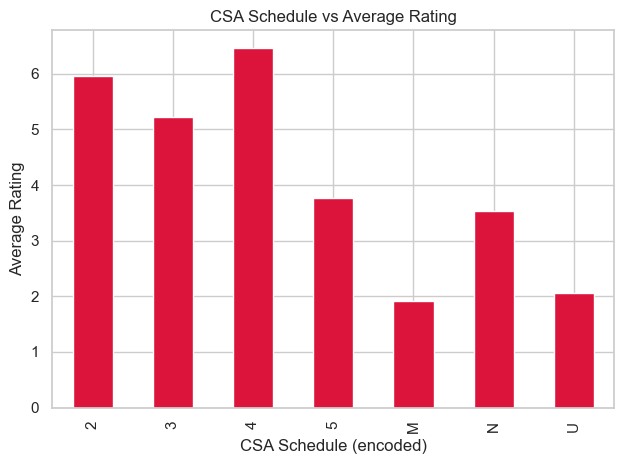

In [36]:
csa_grouped = df.groupby('csa')['rating'].mean()

csa_grouped.plot(kind='bar', color='crimson')
plt.title("CSA Schedule vs Average Rating")
plt.xlabel("CSA Schedule (encoded)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.savefig('../images/csa_rating_comparison.png')
plt.show()


In [37]:
# Convert needed columns to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'], errors='coerce')
df['activity'] = pd.to_numeric(df['activity'], errors='coerce')
df['alcohol'] = df['alcohol'].replace({'X': 1}).fillna(0)

# Label encode categories like pregnancy_category and csa
from sklearn.preprocessing import LabelEncoder

label_cols = ['pregnancy_category', 'csa', 'rx_otc']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


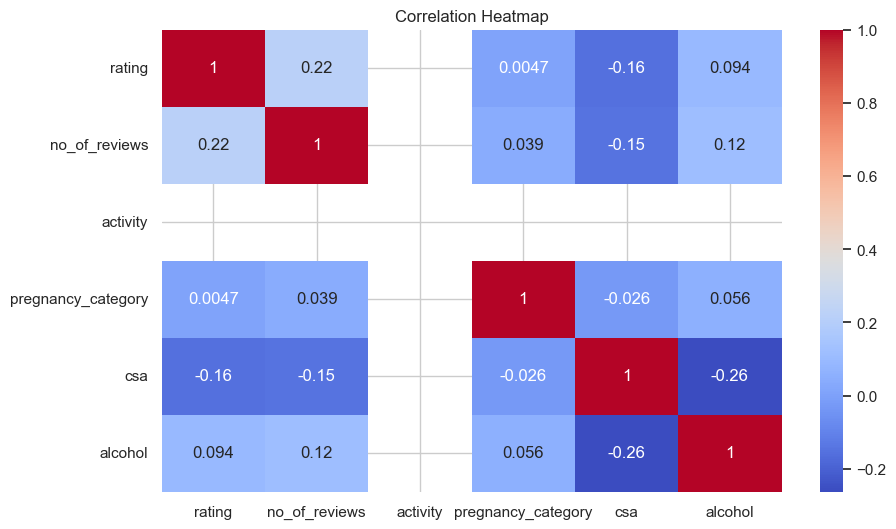

In [38]:
# Encode categorical columns
label_cols = ['rx_otc', 'pregnancy_category', 'csa']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Create heatmap data
heatmap_data = df[['rating', 'no_of_reviews', 'activity', 'pregnancy_category', 'csa', 'alcohol']]
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('images/heatmap.png')
plt.show()


## ✅ Insights Summary

- Most common condition: Pain, followed by Colds & Flu
- Most frequent side effects: hives, difficulty breathing, itching
- CSA Schedule 2 drugs have more risk and lower ratings
- OTC drugs generally get better user ratings
- Drugs interacting with alcohol tend to receive cautious reviews


In [39]:
df.to_csv('../data/cleaned_drugs_dataset.csv', index=False)


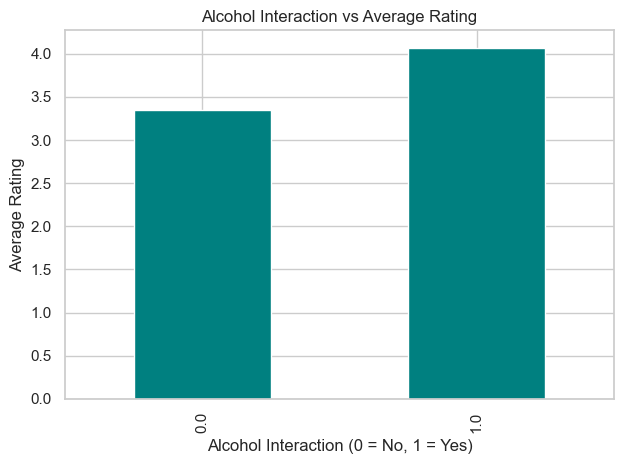

In [40]:
alcohol_rating = df.groupby('alcohol')['rating'].mean()

alcohol_rating.plot(kind='bar', color='teal')
plt.title("Alcohol Interaction vs Average Rating")
plt.xlabel("Alcohol Interaction (0 = No, 1 = Yes)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.savefig('../images/alcohol_interaction_rating.png')
plt.show()
